In [173]:
# Installing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_theme()

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import os

In [77]:
path = os.path.dirname(os.getcwd()) + "\\Data\\ecommerce.csv"
df = pd.read_csv(path)

df.head()

,order_id,customer_id,city,state,status,date_purchased,date_delivered,order_item_id,product_name,price,freight_value,review_score,comment
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1,cool_stuff,58.9,13.29,5,NaN
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,1,pet_shop,239.9,19.93,4,NaN
2,0009c9a17f916a706d71784483a5d643,8a250edc40ebc5c3940ebc940f16a7eb,campinas,SP,delivered,2018-04-25 09:10:41,2018-04-30 17:54:25,1,consoles_games,639.0,11.34,4,NaN
3,000e562887b1f2006d75e0be9558292e,2b01d668726fb0b751c55918c0437b7b,cubatao,SP,delivered,2018-02-22 11:54:42,2018-03-12 18:46:34,1,cool_stuff,25.0,16.11,3,NaN
4,0010b2e5201cc5f1ae7e9c6cc8f5bd00,57ef317d4818cb42680fc9dfd13867ce,rio de janeiro,RJ,delivered,2017-09-11 17:39:33,2017-09-23 13:21:21,1,cool_stuff,48.9,16.60,5,NaN


In [62]:
# Basic info
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        7584 non-null   object        
 1   customer_id     7584 non-null   object        
 2   city            7584 non-null   object        
 3   state           7584 non-null   category      
 4   status          7584 non-null   object        
 5   date_purchased  7584 non-null   datetime64[ns]
 6   date_delivered  7431 non-null   datetime64[ns]
 7   order_item_id   7584 non-null   int64         
 8   product_name    7584 non-null   object        
 9   price           7584 non-null   float64       
 10  freight_value   7584 non-null   float64       
 11  review_score    7584 non-null   int64         
 12  comment         693 non-null    object        
dtypes: category(1), datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 3.4 MB


In [63]:
# Describe
df.describe()

,order_item_id,price,freight_value,review_score
count,7584.000000,7584.000000,7584.000000,7584.000000
mean,1.107068,143.151799,20.443907,4.116693
std,0.445805,189.937922,14.882397,1.323448
min,1.000000,2.900000,0.030000,1.000000
25%,1.000000,48.900000,13.597500,4.000000
50%,1.000000,99.900000,16.810000,5.000000
75%,1.000000,166.990000,21.547500,5.000000
max,7.000000,4099.990000,196.940000,5.000000


## Data Validation, Data Types

### Review Score

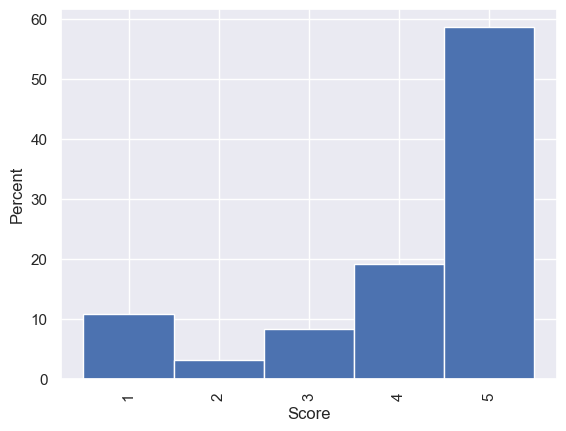

In [51]:
(100*df["review_score"].value_counts(normalize=True)).sort_index().plot(kind="bar", width=1, xlabel="Score", ylabel="Percent");

It can be seen that usually the review scores are high, and also that these categories are imbalanced.

### Dates

#### Date Purchased

In [78]:
df["date_purchased"] = pd.to_datetime(df["date_purchased"]).dt.to_period('H')
df["date_purchased"]

0       2017-09-13 08:00
1       2017-04-26 10:00
2       2018-04-25 09:00
3       2018-02-22 11:00
4       2017-09-11 17:00
              ...       
7579    2017-09-12 21:00
7580    2017-11-04 13:00
7581    2017-06-06 12:00
7582    2018-06-29 14:00
7583    2018-02-27 08:00
Name: date_purchased, Length: 7584, dtype: period[H]

#### Date Delivered

In [84]:
df["date_delivered"] = pd.to_datetime(df["date_delivered"]).dt.to_period('H')
df["date_delivered"]

0       2017-09-20 23:00
1       2017-05-12 16:00
2       2018-04-30 17:00
3       2018-03-12 18:00
4       2017-09-23 13:00
              ...       
7579    2017-09-19 23:00
7580    2017-11-08 21:00
7581    2017-06-16 17:00
7582    2018-07-03 16:00
7583    2018-03-07 14:00
Name: date_delivered, Length: 7584, dtype: period[H]

### State

In [61]:
df["state"] = df["state"].astype("category")

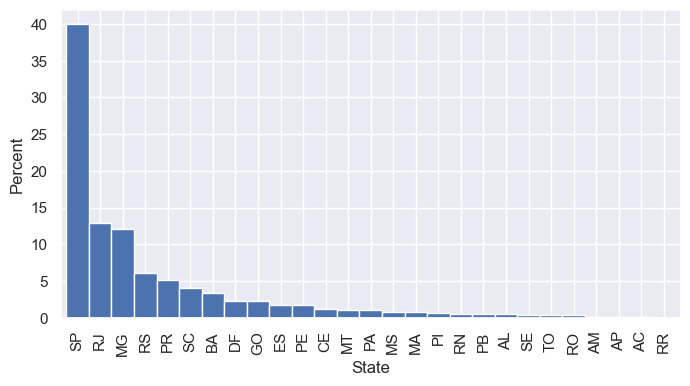

In [94]:
(100*df["state"].value_counts(normalize=True)).plot(kind="bar", width=1, figsize=(8,4), xlabel="State", ylabel="Percent");

### Status

In [97]:
df["status"] = df["status"].astype("category")

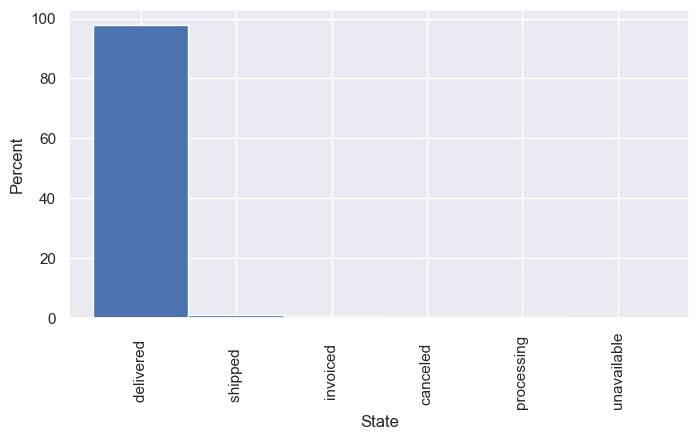

In [98]:
(100*df["status"].value_counts(normalize=True)).plot(kind="bar", width=1, figsize=(8,4), xlabel="State", ylabel="Percent");

### Product Name

In [101]:
df["product_name"] = df["product_name"].astype("category")

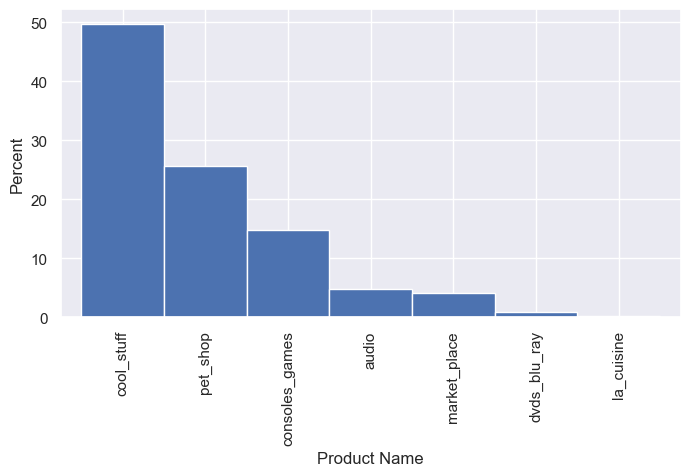

In [104]:
(100*df["product_name"].value_counts(normalize=True)).plot(kind="bar", width=1, figsize=(8,4), xlabel="Product Name", ylabel="Percent");

### Price

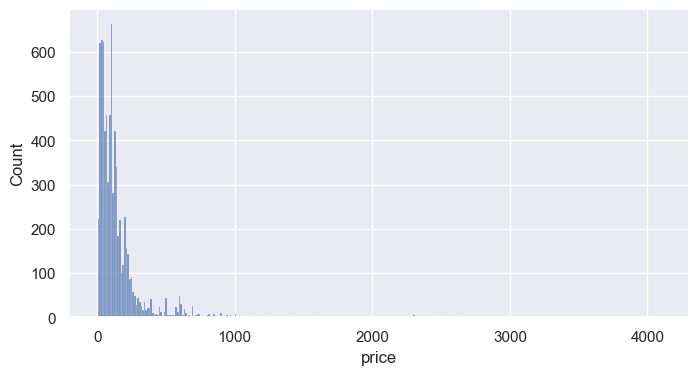

In [117]:
_, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df, x="price");

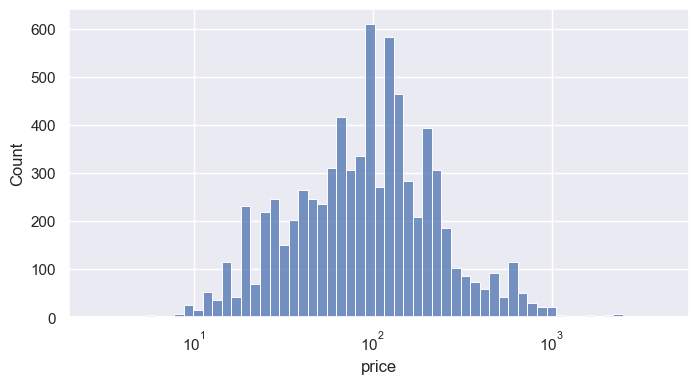

In [122]:
_, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df, x="price", log_scale=True);

### Freight Value

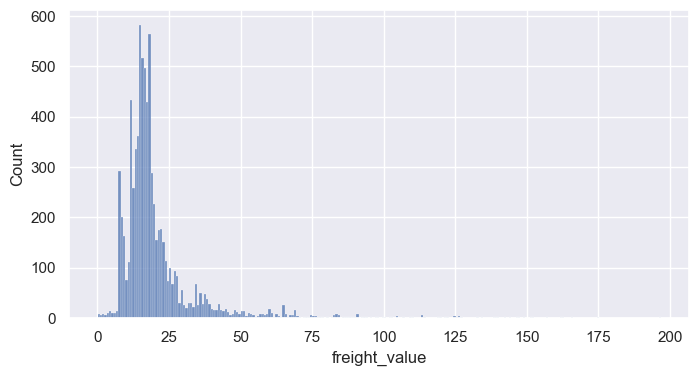

In [125]:
_, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df, x="freight_value");

### Comments

In [145]:
series_comm_split = df[~df["comment"].isna()]["comment"].map(lambda x: x.split())

list_words = []
[x for x in series_comm_split[55]]

['Comprei', '02,', 'recebi', '01']

In [165]:
text = " ".join([" ".join(series_comm_split.to_list()[x]) for x in range(series_comm_split.shape[0])])

In [183]:
stop_words = set(stopwords.words('portuguese'))
word_tokens = word_tokenize(text)

filtered_sentence = [w.lower() for w in word_tokens if w not in stop_words and w.isalpha()]

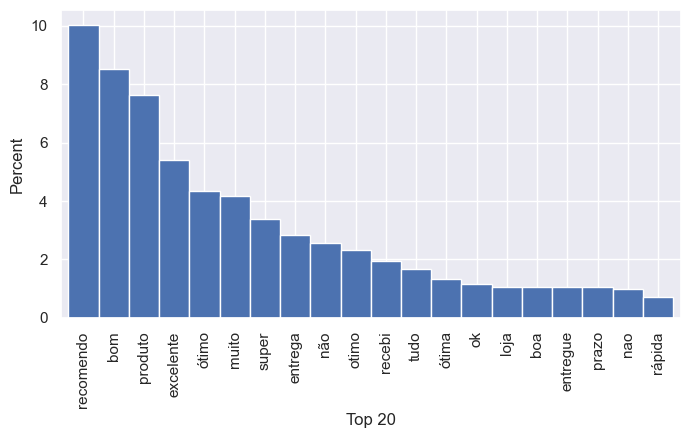

In [203]:
n_words = 20
(100*pd.Series(filtered_sentence).value_counts(normalize=True)[:n_words]).plot(kind="bar", width=1, figsize=(8,4),
            xlabel=f"Top {n_words}", ylabel="Percent");